### Performing EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


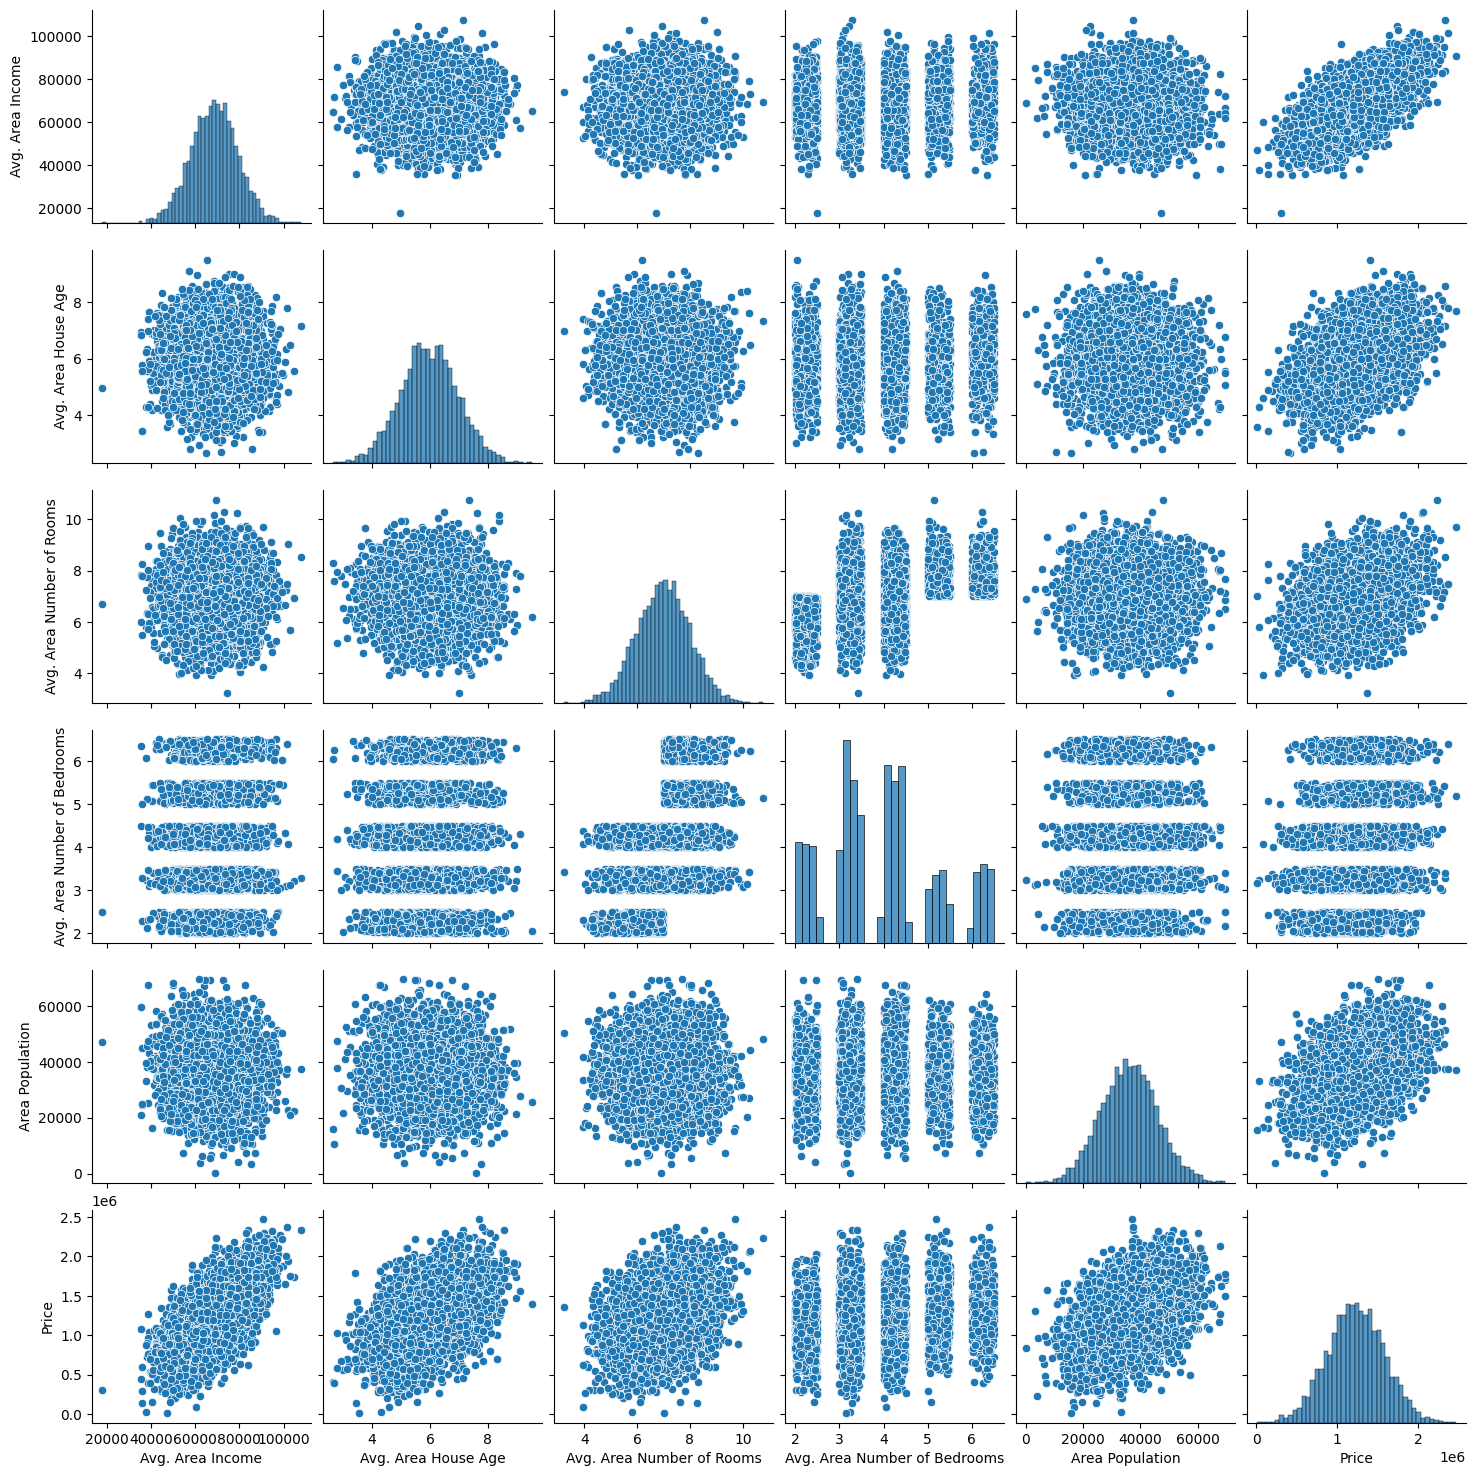

In [3]:
res1 = df.select_dtypes(include=np.number)
sns.pairplot(data = res1)

In [4]:
df.shape

(5000, 7)

In [5]:
num = df.select_dtypes(include="number")
# for num in df_new:
skew = num.skew()
print("\nSkew\n")
print(skew)

print("\nKurt\n")
kurt = num.kurt()
print(kurt)


Skew

Avg. Area Income               -0.033720
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.040996
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.050650
Price                          -0.002718
dtype: float64

Kurt

Avg. Area Income                0.045574
Avg. Area House Age            -0.083437
Avg. Area Number of Rooms      -0.074652
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.006733
Price                          -0.054918
dtype: float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


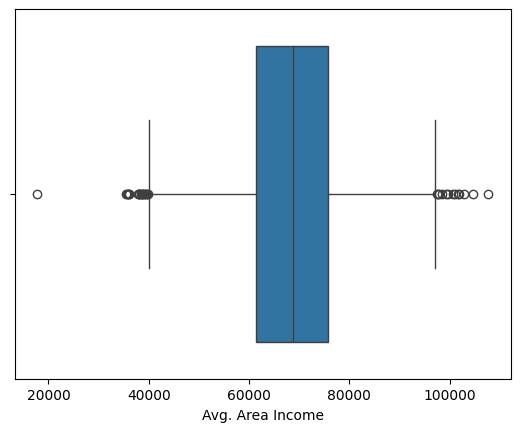

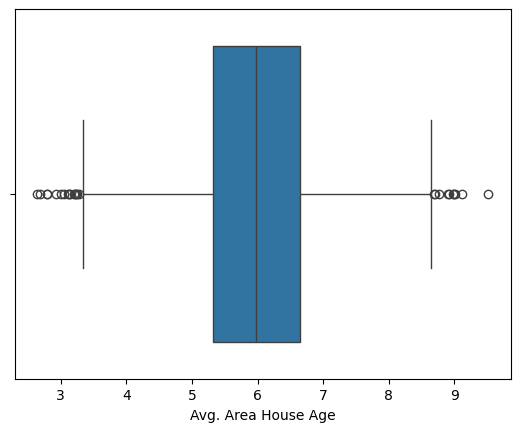

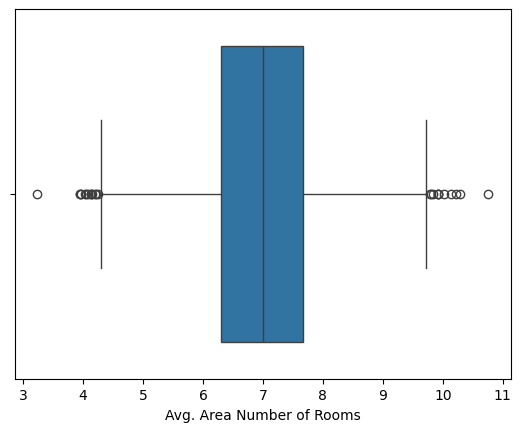

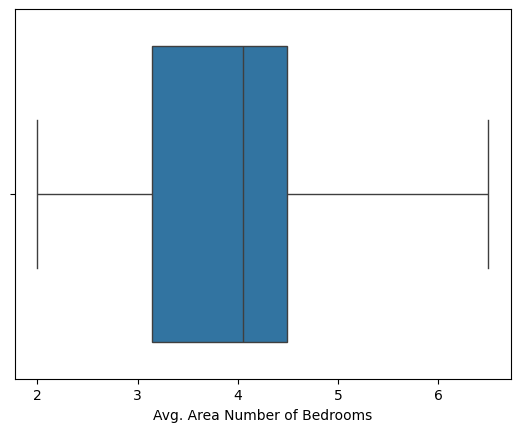

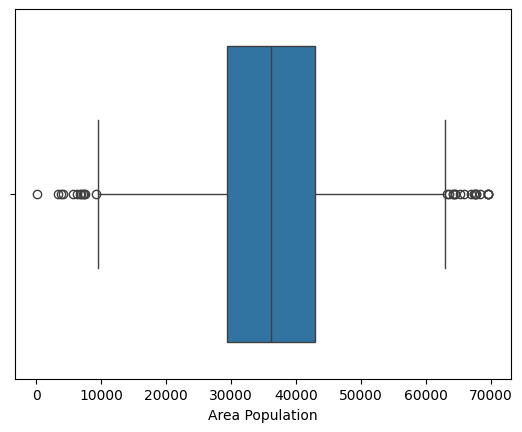

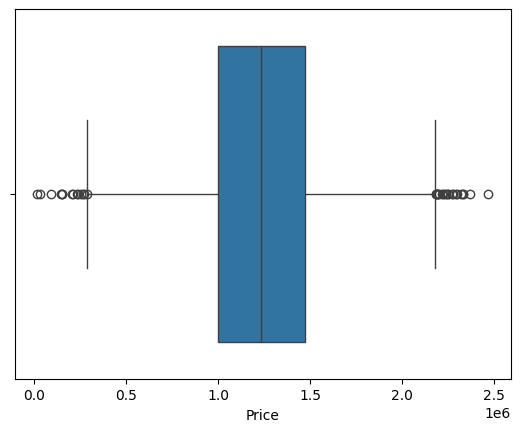

In [7]:
# df_new = df_new.drop(["Address"], axis = 1)
num = df.select_dtypes(include='number')
for column in num.columns :
    plt.figure()
    sns.boxplot(x = num[column], data = df)

In [8]:
# Function to apply IQR filtering
def remove_outliers_iqr(data):
    # Select only numeric columns
    numeric_cols = data.select_dtypes(include=["number"])
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only rows within bounds
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
 
# Apply IQR removal
df = remove_outliers_iqr(df)
 
# Preview result
df.shape

(4856, 7)

In [9]:
x = df.drop(['Address', 'Price'], axis=1)
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [10]:
y = df['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4856, dtype: float64

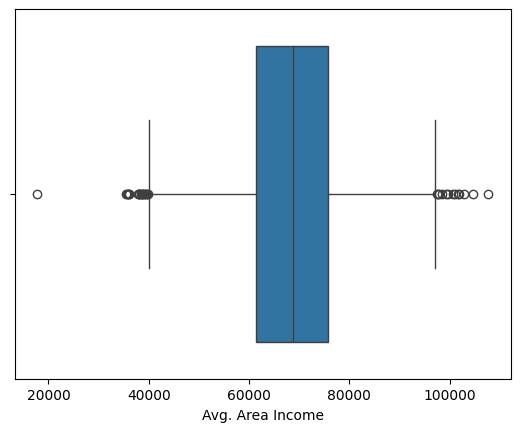

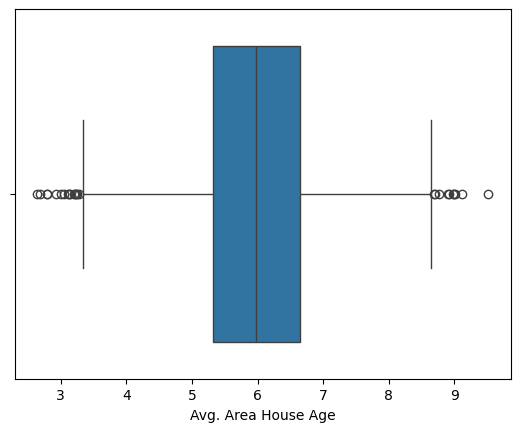

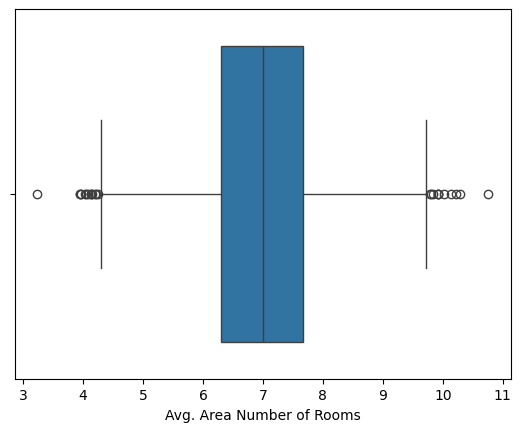

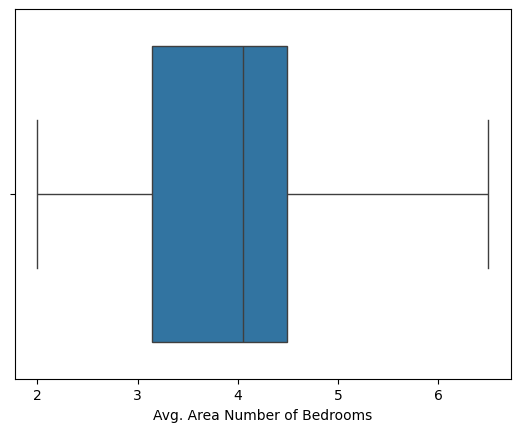

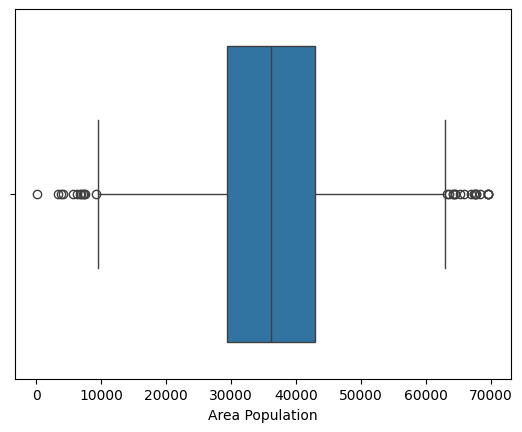

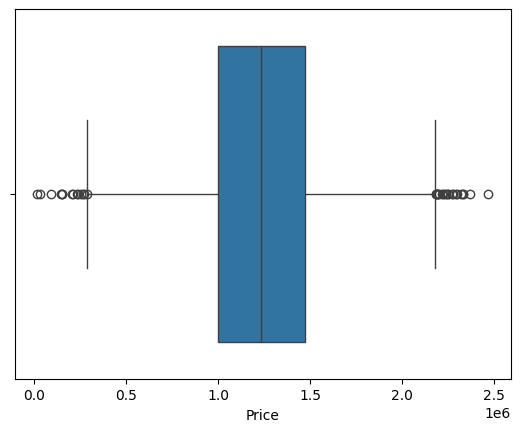

In [11]:
# num = df_new.select_dtypes(include='number')
for column in num.columns :
    plt.figure()
    sns.boxplot(x = num[column], data = df)

In [12]:
num = df.select_dtypes(include='number')
corr = num.corr()
print(corr)

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.025542   
Avg. Area House Age                  -0.025542             1.000000   
Avg. Area Number of Rooms            -0.024843            -0.019152   
Avg. Area Number of Bedrooms          0.009722            -0.001091   
Area Population                      -0.017319            -0.026308   
Price                                 0.628735             0.439235   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.024843   
Avg. Area House Age                           -0.019152   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.466572   
Area Population                               -0.001521   
Price                                          0.327427   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

<Axes: >

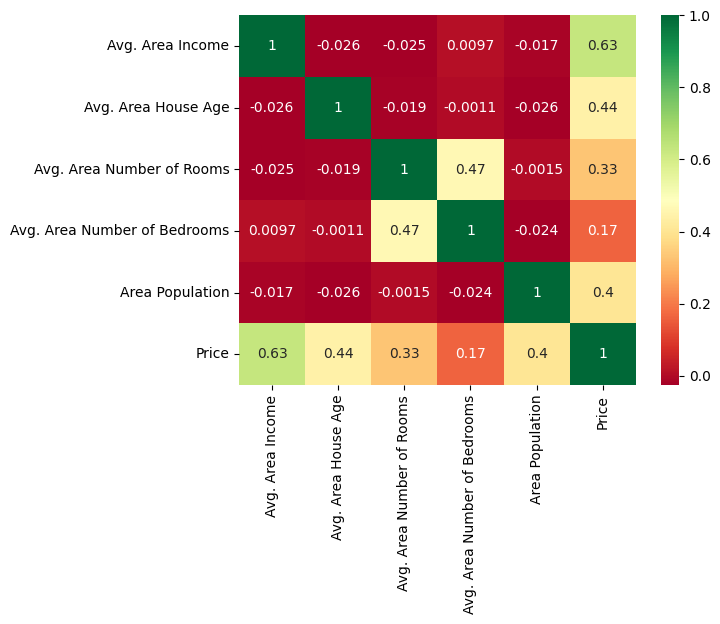

In [13]:
sns.heatmap(corr, cmap = 'RdYlGn', annot = True)

### Linear Regression 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaled = StandardScaler()
scaled_x_train = scaled.fit_transform(x_train)
scaled_x_test = scaled.transform(x_test)

ols = LinearRegression()
ols.fit(scaled_x_train, y_train)

#The .fit() method trains the linear regression model using the provided data.
y_pred_train = ols.predict(scaled_x_train)
y_pred = ols.predict(scaled_x_test)

r2 = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred, y_test)

print(r2)
print(r2_test)

0.89965316815447
0.9091140900826533


### Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
 
# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
 
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
 
#The alpha parameter determines how much the model coefficients are penalized for being large. Higher values of alpha lead to more regularization,
#resulting in simpler models with coefficients closer to zero. This can help prevent overfitting. The default value for alpha is 1.0.

ridge = Ridge(alpha =1.0)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)
y_pred_train = ridge.predict(x_train) 
# Assuming y_test is your true values and y_pred is from your model
# rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

 
# print(f"RMSE: {rmse}")
print(f"R² Score for test data: {r2}")
print(f"r2 Score for training data: {r2_train}")

R² Score for test data: 0.9049743867993902
r2 Score for training data: 0.9120470670901016


### Decision Tree Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

y_pred_train = dtree.predict(x_train)
y_pred = dtree.predict(x_test)

r2 = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred, y_test)

print(r2)
print(r2_test)


1.0
0.7277276333418825


### Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred = rf.predict(x_test)

r2 = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred, y_test)

print(r2)
print(r2_test)

0.981683709320944
0.8587820104490125


### XGBoost Regression

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
xg = XGBRegressor()
xg.fit(x_train, y_train)

y_pred_train = xg.predict(x_train)
y_pred = xg.predict(x_test)

r2 = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred, y_test)

print(r2)
print(r2_test)

0.9816578344270417
0.8563137359492088


### AdaBoost Regression

In [19]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Base learner
base_learner = DecisionTreeRegressor(max_depth=9)

# AdaBoost Regressor
adaboost = AdaBoostRegressor(estimator=base_learner, n_estimators=100, learning_rate=0.1)
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)
y_pred_train = adaboost.predict(x_train)

r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

print("r2 score for training data: ", r2_train)
print("r2 score for test data", r2)

r2 score for training data:  0.968256613980677
r2 score for test data 0.8730562255114616


### Catboost Regression

In [20]:
from catboost import CatBoostRegressor

# verbose=0: Silent mode. No output is displayed during training. This is useful when you want to minimize console output, 
# especially in production environments.
catboost = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, verbose=0)
catboost.fit(x_train, y_train)
y_pred = catboost.predict(x_test)
y_pred_train = catboost.predict(x_train)

r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

print("r2 score for training data: ", r2_train)
print("r2 score for test data", r2)

r2 score for training data:  0.9144846337740118
r2 score for test data 0.9047834661842621


### LightGBM Regression

In [21]:
import lightgbm as lgb

# LightGBM Regressor
lgbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)
y_pred_train = lgbm.predict(x_train)

r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

print("r2 score for training data: ", r2_train)
print("r2 score for test data", r2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1251
[LightGBM] [Info] Number of data points in the train set: 3884, number of used features: 5
[LightGBM] [Info] Start training from score 1229516.605867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

### HyperParameter Tuning

### Rdige Regression gridSearchCV 

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np
 
ridge = Ridge()
alpha_space = np.logspace(-5, 8, 15)
param_grid = {'alpha': alpha_space}
 
reg_cv = GridSearchCV(ridge, param_grid, cv=5)
reg_cv.fit(x_train, y_train)

# for Ridge regression
y_predict_train_cv = reg_cv.predict(x_train)
y_predict_test_cv = reg_cv.predict(x_test)
 
print("r2 score of training data: ",r2_score(y_train, y_predict_train_cv))
print("\n")
print("r2 score for test data: ",r2_score(y_test, y_predict_test_cv))

r2 score of training data:  0.9110918611999459


r2 score for test data:  0.9092793421993749


### RandomizedCV

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Model
ridge = Ridge()

# Define parameter space
param_dist = {'alpha': np.logspace(-5, 8, 200)}

# Randomized search
ridge_random_search = RandomizedSearchCV(
    ridge,
    param_distributions=param_dist,
    n_iter=100,         # Number of parameter settings sampled
    cv=5,              # 5-fold cross-validation
    scoring='r2',      # or 'neg_mean_squared_error' for regression
    random_state=42
)

# Fit the model
ridge_random_search.fit(x_train, y_train)
y_predict_train_rrs = ridge_random_search.predict(x_train)
y_predict_test_rrs = ridge_random_search.predict(x_test)

print("r2 score of training data: ",r2_score(y_train, y_predict_train_rrs))
print("\n")
print("r2 score for test data: ",r2_score(y_test, y_predict_test_rrs))


r2 score of training data:  0.9110921094943762


r2 score for test data:  0.909280269480227


### GridSearchCV Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# GridSearchCV
grid_search_DT = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search_DT.fit(x_train, y_train)

# Best model
best_dt = grid_search_DT.best_estimator_

# Predict
y_predict_train = best_dt.predict(x_train)
y_predict_test = best_dt.predict(x_test)

# Scores
from sklearn.metrics import r2_score
print("r2 score for traing data: ", r2_score(y_train, y_predict_train))
print("r2 score for test data: ",r2_score(y_test, y_predict_test))
print("Best Parameters:", grid_search_DT.best_params_)

r2 score for traing data:  0.9362459180399464
r2 score for test data:  0.7806200558236448
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


### RandomizedCV

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# RandomizedSearchCV
random_search_DT = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=30,           # Try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search_DT.fit(x_train, y_train)

# Best model
best_dt_random = random_search_DT.best_estimator_

# Predict
y_predict_train = best_dt_random.predict(x_train)
y_predict_test = best_dt_random.predict(x_test)

# Scores
print("r2 score for training data: ",r2_score(y_train, y_predict_train))
print("r2 score for test data: ", r2_score(y_test, y_predict_test))
print("Best Parameters:", random_search_DT.best_params_)

r2 score for training data:  0.9362459180399464
r2 score for test data:  0.7805859538913451
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 20, 'criterion': 'squared_error'}


### GridCV RandomForest 

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search_rf.fit(x_train, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_

# Predict
y_predict_train = best_rf.predict(x_train)
y_predict_test = best_rf.predict(x_test)

# Scores
from sklearn.metrics import r2_score
print("r2 score for training data: ",r2_score(y_train, y_predict_train))
print("r2 score for test data: ", r2_score(y_test, y_predict_test))
print("Best Parameters:", grid_search_rf.best_params_)

# y_predict_dt_cv_train = dt_cv.predict(x_train)
# y_predict_dt_cv_test = dt_cv.predict(x_test)

# print(r2_score(y_train, y_predict_dt_cv_train))
# print("\n")
# print(r2_score(y_test, y_predict_dt_cv_test))

r2 score for training data:  0.9581504958180763
r2 score for test data:  0.8763038116275438
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


### RandomizedCV

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,           # Try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search_rf.fit(x_train, y_train)

# Best model
best_rf_random = random_search_rf.best_estimator_

# Predict
y_predict_train = best_rf_random.predict(x_train)
y_predict_test = best_rf_random.predict(x_test)

# Scores
print("r2 score for training data: ", r2_score(y_train, y_predict_train))
print("r2 score for test data: ",r2_score(y_test, y_predict_test))
print("Best Parameters:", random_search_rf.best_params_)

r2 score for training data:  0.9746238008087034
r2 score for test data:  0.8773950630138252
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'squared_error'}


### XGBoost GridSearchCV Regression

In [30]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
 
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}
 
xgb_model = xgb.XGBRegressor()
grid_search_xg = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_xg.fit(x_train, y_train)

y_predict_train_cv = grid_search_xg.predict(x_train)
y_predict_test_cv = grid_search_xg.predict(x_test)
 
print("r2 score of training data: ",r2_score(y_train, y_predict_train_cv))
print("\n")
print("r2 score for test data: ",r2_score(y_test, y_predict_test_cv))

r2 score of training data:  0.9283200856349161


r2 score for test data:  0.8948488769159594


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train the base models
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [32]:
# Make predictions on the validation set
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)
gb_pred = gb.predict(x_test)

In [33]:
from sklearn.linear_model import LinearRegression

# Combine the predictions of the base models into a single feature matrix
X_val_meta = np.column_stack((dt_pred, rf_pred, gb_pred))

# Train the meta-model on the combined feature matrix and the target values
meta_model = LinearRegression()
meta_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:

y_new_meta = meta_model.predict()

### Lightgbm Regression

In [17]:
# import lightgbm as lgb
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.datasets import load_iris
# from sklearn.metrics import accuracy_score

# # Load the Iris dataset
# data = load_iris()
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = data.target

# # Number of folds
# n_splits = 5

# # Create a KFold cross-validator
# kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Initialize a list to store model performance metrics
# metrics = []

# # Define LightGBM hyperparameters
# params = {
#     'objective': 'multiclass',
#     'num_class': 3,  # Number of classes in the Iris dataset
#     'metric': 'multi_logloss',
#     'boosting_type': 'gbdt',
#     'num_leaves': 31,
#     'learning_rate': 0.05,
# }

# # Perform K-Fold Cross-Validation
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     # Create LightGBM datasets for training and testing
#     train_data = lgb.Dataset(X_train, label=y_train)
#     test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

#     # Train a LightGBM model
#     num_round = 100
#     bst = lgb.train(params, train_data, num_round)

#     # Make predictions on the test set
#     y_pred = bst.predict(X_test)

#     # Get the class with the highest predicted probability as the predicted label
#     y_pred_labels = np.argmax(y_pred, axis=1)

#     # Calculate accuracy and store it in the metrics list
#     accuracy = accuracy_score(y_test, y_pred_labels)
#     metrics.append(accuracy)

# # Calculate the average accuracy across all folds
# average_accuracy = np.mean(metrics)
# print(f'Average Accuracy: {average_accuracy:.4f}')

In [26]:
import pandas as pd 
df_new = pd.read_csv("Housing_Information.csv")
df_new

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,92000.432454,5.245857,6.565848,3.5,65000.647659,1.145001e+06,21 Orchid Lane Whitefield
1,80000.547485,8.019722,5.845780,3.0,48000.254668,1.005000e+06,88 Maple Street Tellapur
2,52000.768960,3.553890,7.286855,4.0,72000.526579,2.210000e+06,12 Sapphire Ave Gurugram
3,75000.759879,10.054860,5.086547,2.5,40000.794277,1.850007e+05,34 Lotus Enclave Thane
4,60000.879434,6.854452,6.087375,3.0,55000.645728,1.130001e+06,7 Coral Drive Navi Mumbai
5,40000.245577,4.219727,6.857575,3.5,60000.655576,1.175000e+06,56 Emerald Blvd Noida Ext
6,89000.487794,7.534248,5.586723,3.0,52000.535762,1.130001e+06,19 Amber Heights Sohna
7,90000.687697,2.824548,7.065366,4.0,70000.657343,2.125001e+06,3 Platinum Row Jubilee Hills
8,95000.876790,9.024248,5.275477,2.8,45000.556224,9.500008e+05,101 Rosewood Lane Coimbatore
9,92000.768949,5.519723,6.364646,3.2,58000.245642,1.420001e+06,67 Azure Park Greater Noida


In [43]:
x_test_data = df_new.drop(columns=["Price", "Address"]) 
y_test_data = df_new['Price']
y_new_pred = grid_search_xg.predict(x_test_data)
r2 = r2_score(y_new_pred, y_test_data)
print(r2)

-3.732931939838286


In [38]:
y_new_pred = random_search_rf.predict(x_test_data)
r2 = r2_score(y_new_pred, y_test_data)
print(r2)

-3.9652241255066656


In [39]:
y_new_pred = random_search_DT.predict(x_test_data)
r2 = r2_score(y_new_pred, y_test_data)
print(r2)

-3.8747596295104083


In [40]:
y_new_pred = grid_search_DT.predict(x_test_data)
r2 = r2_score(y_new_pred, y_test_data)
print(r2)

-3.8747596295104083


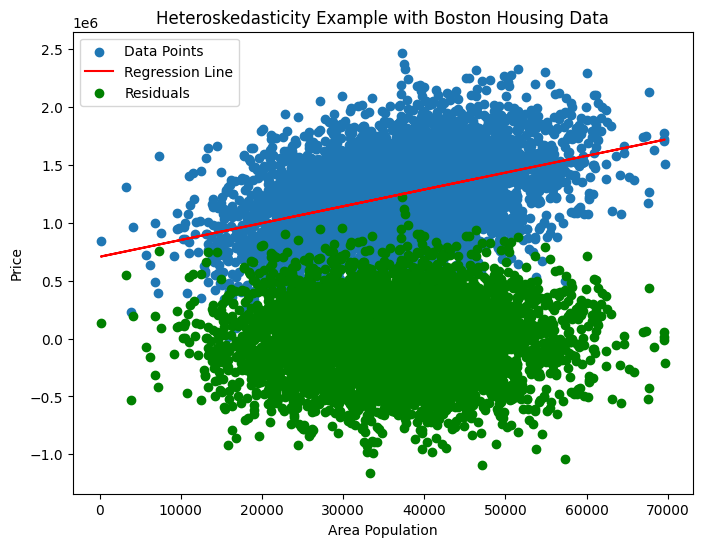

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
 
 
# Extract the independent variable (LSTAT) and dependent variable (MEDV)
X = df['Area Population'].values.reshape(-1, 1)
y = df['Price'].values
 
# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)
y_predicted = regression_model.predict(X)
residuals = y - y_predicted
 
# Plot the scatter plot and residuals
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_predicted, color='red', label='Regression Line')
plt.scatter(X, residuals, color='green', label='Residuals')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.title('Heteroskedasticity Example with Boston Housing Data')
plt.legend()
plt.show()

In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

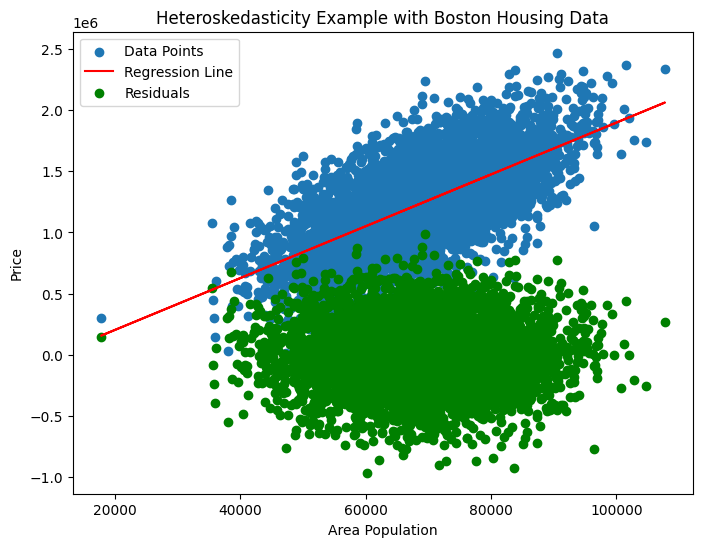

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
 
 
# Extract the independent variable (LSTAT) and dependent variable (MEDV)
X = df['Avg. Area Income'].values.reshape(-1, 1)
y = df['Price'].values
 
# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)
y_predicted = regression_model.predict(X)
residuals = y - y_predicted
 
# Plot the scatter plot and residuals
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_predicted, color='red', label='Regression Line')
plt.scatter(X, residuals, color='green', label='Residuals')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.title('Heteroskedasticity Example with Boston Housing Data')
plt.legend()
plt.show()

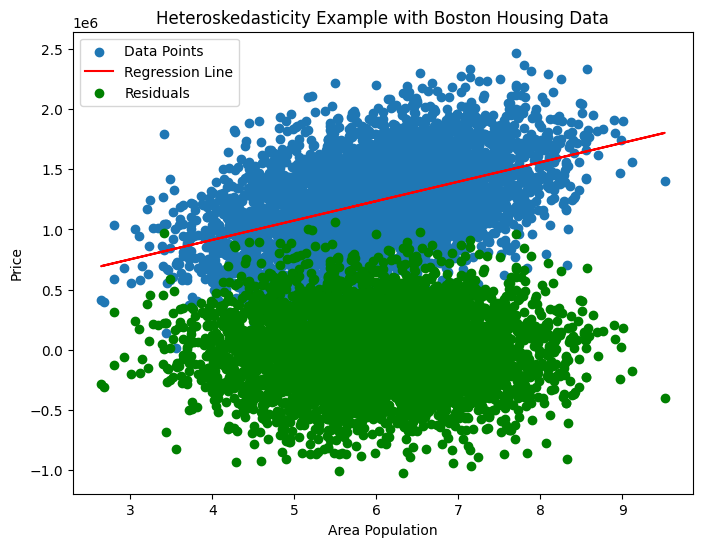

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
 
 
# Extract the independent variable (LSTAT) and dependent variable (MEDV)
X = df['Avg. Area House Age'].values.reshape(-1, 1)
y = df['Price'].values
 
# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)
y_predicted = regression_model.predict(X)
residuals = y - y_predicted
 
# Plot the scatter plot and residuals
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_predicted, color='red', label='Regression Line')
plt.scatter(X, residuals, color='green', label='Residuals')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.title('Heteroskedasticity Example with Boston Housing Data')
plt.legend()
plt.show()

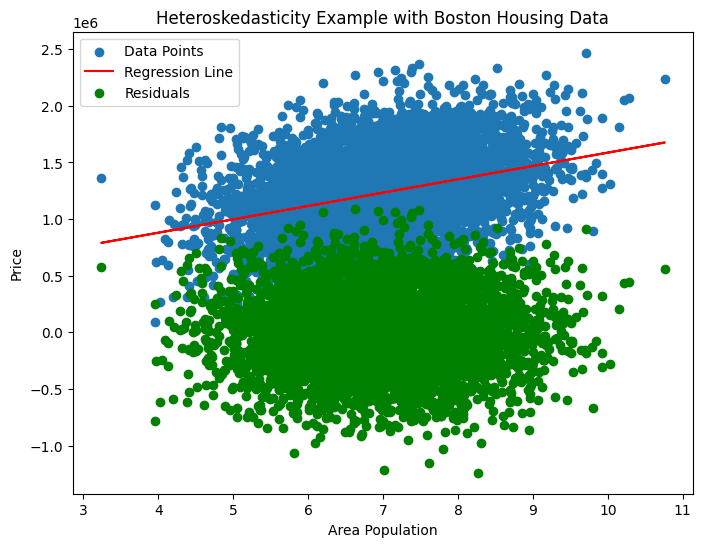

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
 
 
# Extract the independent variable (LSTAT) and dependent variable (MEDV)
X = df['Avg. Area Number of Rooms'].values.reshape(-1, 1)
y = df['Price'].values
 
# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)
y_predicted = regression_model.predict(X)
residuals = y - y_predicted
 
# Plot the scatter plot and residuals
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_predicted, color='red', label='Regression Line')
plt.scatter(X, residuals, color='green', label='Residuals')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.title('Heteroskedasticity Example with Boston Housing Data')
plt.legend()
plt.show()

NameError: name 'dt_pred' is not defined